#Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
myDirFiles = "/content/drive/MyDrive/Pandas"
os.chdir(myDirFiles)

Mounted at /content/drive


#Load Data

In [2]:
import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('customer-segmentation.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [6]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Hanya ada 11 data yang kosong

#Data Exploratory

In [7]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [8]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

Pada kali ini kita akan melakukan segmentasi terhadap segment consumer terlebih dahulu

In [9]:
df['City'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

In [10]:
df['State'].value_counts()

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 41
Nevada        

Kolom City dan state tidak perlu dimasukan pada saat segemntasi/clustering, tetapi akan digunakan setelah clustering. Karena kita ingin mengetahui behaviour pada clustering.

In [11]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [12]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

Gunakan salah satu antara Category atau Sub-Category karena memiliki informasi yang sama

Feature yang akan digunakan 
1. Ship Mode
2. Category
3. Sales

Tapi hanya untuk customer yang bersegment consumer
Ikut sertakan Customer ID untuk aggregasi

#Segementasi Consumer

In [13]:
df_consumer = df[df['Segment'] == 'Consumer'][['Customer ID','Ship Mode','Category','Sales']]
df_consumer.head()

,Customer ID,Ship Mode,Category,Sales
0,CG-12520,Second Class,Furniture,261.9600
1,CG-12520,Second Class,Furniture,731.9400
3,SO-20335,Standard Class,Furniture,957.5775
4,SO-20335,Standard Class,Office Supplies,22.3680
5,BH-11710,Standard Class,Furniture,48.8600


Selanjutnya kita akan melakukan agregasi. Sebelum itu kita harus mengubah data
kategorikal menjadi numerikal

##One Hot Encoding Categorical

In [14]:
df_consumer_category = pd.get_dummies(df_consumer['Category'])
df_consumer_ship = pd.get_dummies(df_consumer['Ship Mode'])

df_consumer = pd.concat([df_consumer, df_consumer_category, df_consumer_ship], axis = 1)
df_consumer

,Customer ID,Ship Mode,Category,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
0,CG-12520,Second Class,Furniture,261.9600,1,0,0,0,0,1,0
1,CG-12520,Second Class,Furniture,731.9400,1,0,0,0,0,1,0
3,SO-20335,Standard Class,Furniture,957.5775,1,0,0,0,0,0,1
4,SO-20335,Standard Class,Office Supplies,22.3680,0,1,0,0,0,0,1
5,BH-11710,Standard Class,Furniture,48.8600,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9790,CJ-12010,Standard Class,Furniture,211.2460,1,0,0,0,0,0,1
9791,KH-16360,Second Class,Office Supplies,56.0640,0,1,0,0,0,1,0
9792,KH-16360,Second Class,Furniture,107.7720,1,0,0,0,0,1,0
9793,KH-16360,Second Class,Office Supplies,4.8320,0,1,0,0,0,1,0


In [15]:
df_consumer.drop(['Ship Mode','Category'], axis=1, inplace=True)

In [16]:
df_consumer.head()

,Customer ID,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
0,CG-12520,261.9600,1,0,0,0,0,1,0
1,CG-12520,731.9400,1,0,0,0,0,1,0
3,SO-20335,957.5775,1,0,0,0,0,0,1
4,SO-20335,22.3680,0,1,0,0,0,0,1
5,BH-11710,48.8600,1,0,0,0,0,0,1


Hasil di atas masih per transaki, selanjutnya kita akan melakukan agregasi per customer saja

##Aggregate per User

Apa yang kita butuh per customer:
1. Sales : Average,Total
2. Total Transaksi
3. Furniture, Office Supplies : Average
4. First class, Same day, Second class : Average

In [17]:
df_consumer.groupby('Customer ID').mean()

,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
Customer ID,,,,,,,,
AA-10315,505.778182,0.090909,0.727273,0.181818,0.090909,0.000000,0.000000,0.909091
AA-10375,70.426000,0.066667,0.733333,0.200000,0.266667,0.000000,0.200000,0.533333
AA-10480,149.209333,0.166667,0.666667,0.166667,0.000000,0.083333,0.000000,0.916667
AA-10645,282.607500,0.444444,0.444444,0.111111,0.388889,0.000000,0.000000,0.611111
AB-10015,147.692667,0.333333,0.500000,0.166667,0.833333,0.000000,0.000000,0.166667
...,...,...,...,...,...,...,...,...
VS-21820,131.997625,0.375000,0.500000,0.125000,0.000000,0.000000,0.250000,0.750000
WB-21850,175.134571,0.142857,0.628571,0.228571,0.171429,0.314286,0.000000,0.514286
XP-21865,84.809214,0.142857,0.750000,0.107143,0.071429,0.000000,0.107143,0.821429


Untuk memudahkan pekerjaan kita akan menggunakan multi aggregasi

In [18]:
df_consumer_agg = df_consumer_agg = df_consumer.groupby('Customer ID').agg({
    # Pola ==> "Kolom": [('kolom_baru', 'fungsi_aggregasi')]
    # ship mode
    'First Class': [('avg_first_class', 'mean')],
    'Second Class': [('avg_second_class', 'mean')],
    'Same Day': [('avg_same_day', 'mean')],
    'Standard Class': [('avg_standard_class', 'mean')],
    
    # category
    'Furniture': [('avg_furniture', 'mean')],
    'Office Supplies': [('avg_office_sup', 'mean')],
    'Technology': [('avg_tech', 'mean')],
    
    # sales
    'Sales': [('avg_sales', 'mean'), ('total_trx', 'count'), ('total_sales', 'sum')]
})

In [19]:
df_consumer_agg 

First Class     Second Class     Same Day     Standard Class  \
            avg_first_class avg_second_class avg_same_day avg_standard_class   
Customer ID                                                                    
AA-10315           0.090909         0.000000     0.000000           0.909091   
AA-10375           0.266667         0.200000     0.000000           0.533333   
AA-10480           0.000000         0.000000     0.083333           0.916667   
AA-10645           0.388889         0.000000     0.000000           0.611111   
AB-10015           0.833333         0.000000     0.000000           0.166667   
...                     ...              ...          ...                ...   
VS-21820           0.000000         0.250000     0.000000           0.750000   
WB-21850           0.171429         0.000000     0.314286           0.514286   
XP-21865           0.071429         0.107143     0.000000           0.821429   
ZC-21910           0.129032         0.032258     0.000000           0.838710   
ZD-21925           0.111111         0.333333     0.222222           0.333333   

                Furniture Office Supplies Technology       Sales            \
            avg_furniture  avg_office_sup   avg_tech   avg_sales total_trx   
Customer ID                                                                  
AA-10315         0.090909        0.727273   0.181818  505.778182        11   
AA-10375         0.066667        0.733333   0.200000   70.426000        15   
AA-10480         0.166667        0.666667   0.166667  149.209333        12   
AA-10645         0.444444        0.444444   0.111111  282.607500        18   
AB-10015         0.333333        0.500000   0.166667  147.692667         6   
...                   ...             ...        ...         ...       ...   
VS-21820         0.375000        0.500000   0.125000  131.997625         8   
WB-21850         0.142857        0.628571   0.228571  175.134571        35   
XP-21865         0.142857        0.750000   0.107143   84.809214        28   
ZC-21910         0.258065        0.548387   0.193548  258.893774        31   
ZD-21925         0.222222        0.444444   0.333333  165.993778         9   

                         
            total_sales  
Customer ID              
AA-10315       5563.560  
AA-10375       1056.390  
AA-10480       1790.512  
AA-10645       5086.935  
AB-10015        886.156  
...                 ...  
VS-21820       1055.981  
WB-21850       6129.710  
XP-21865       2374.658  
ZC-21910       8025.707  
ZD-21925       1493.944  

[409 rows x 10 columns]

In [20]:
df_consumer_agg['First Class']['avg_first_class']

Customer ID
AA-10315    0.090909
AA-10375    0.266667
AA-10480    0.000000
AA-10645    0.388889
AB-10015    0.833333
              ...   
VS-21820    0.000000
WB-21850    0.171429
XP-21865    0.071429
ZC-21910    0.129032
ZD-21925    0.111111
Name: avg_first_class, Length: 409, dtype: float64

In [21]:
#menghilangkan multi level column
df_consumer_agg.columns = df_consumer_agg.columns.droplevel()

In [22]:
df_consumer_agg.head()

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
Customer ID,,,,,,,,,,
AA-10315,0.090909,0.0,0.000000,0.909091,0.090909,0.727273,0.181818,505.778182,11,5563.560
AA-10375,0.266667,0.2,0.000000,0.533333,0.066667,0.733333,0.200000,70.426000,15,1056.390
AA-10480,0.000000,0.0,0.083333,0.916667,0.166667,0.666667,0.166667,149.209333,12,1790.512
AA-10645,0.388889,0.0,0.000000,0.611111,0.444444,0.444444,0.111111,282.607500,18,5086.935
AB-10015,0.833333,0.0,0.000000,0.166667,0.333333,0.500000,0.166667,147.692667,6,886.156


In [23]:
df_consumer_agg['avg_first_class']

Customer ID
AA-10315    0.090909
AA-10375    0.266667
AA-10480    0.000000
AA-10645    0.388889
AB-10015    0.833333
              ...   
VS-21820    0.000000
WB-21850    0.171429
XP-21865    0.071429
ZC-21910    0.129032
ZD-21925    0.111111
Name: avg_first_class, Length: 409, dtype: float64

Data kita sudah tersusun berdasarkan customer sehingganya bisa dilanjut ke tahap clustering

Dikarenakan perbedaan skala di df_consumer_agg maka diharuskan dilakukan scaling

##Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_consumer_agg)

StandardScaler()

In [25]:
df_consumer_agg.columns

Index(['avg_first_class', 'avg_second_class', 'avg_same_day',
       'avg_standard_class', 'avg_furniture', 'avg_office_sup', 'avg_tech',
       'avg_sales', 'total_trx', 'total_sales'],
      dtype='object')

In [26]:
X = scaler.transform(df_consumer_agg)
X.shape

(409, 10)

In [27]:
X

array([[-0.33345614, -0.92878641, -0.49676041, ...,  1.80657524,
        -0.23430635,  1.06674543],
       [ 0.64500967,  0.02881738, -0.49676041, ..., -0.90936659,
         0.40244646, -0.67745476],
       [-0.83955915, -0.92878641,  0.14606687, ..., -0.41787726,
        -0.07511815, -0.39336169],
       ...,
       [-0.44190679, -0.41578438, -0.49676041, ..., -0.819637  ,
         2.47189307, -0.16730686],
       [-0.1212194 , -0.77433419, -0.49676041, ...,  0.26638843,
         2.94945768,  2.01955556],
       [-0.22098881,  0.66721991,  1.21744566, ..., -0.31316761,
        -0.55268275, -0.5081286 ]])

##KMeans

In [28]:
from sklearn.cluster import KMeans
km =KMeans(3) #Ambil contoh jumlah cluster
km.fit(X)

KMeans(n_clusters=3)

In [29]:
km.predict(X)

array([2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1,

In [30]:
df_consumer_agg['cluster'] = km.predict(X)
df_consumer_agg

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
AA-10315,0.090909,0.000000,0.000000,0.909091,0.090909,0.727273,0.181818,505.778182,11,5563.560,2
AA-10375,0.266667,0.200000,0.000000,0.533333,0.066667,0.733333,0.200000,70.426000,15,1056.390,0
AA-10480,0.000000,0.000000,0.083333,0.916667,0.166667,0.666667,0.166667,149.209333,12,1790.512,0
AA-10645,0.388889,0.000000,0.000000,0.611111,0.444444,0.444444,0.111111,282.607500,18,5086.935,2
AB-10015,0.833333,0.000000,0.000000,0.166667,0.333333,0.500000,0.166667,147.692667,6,886.156,1
...,...,...,...,...,...,...,...,...,...,...,...
VS-21820,0.000000,0.250000,0.000000,0.750000,0.375000,0.500000,0.125000,131.997625,8,1055.981,0
WB-21850,0.171429,0.000000,0.314286,0.514286,0.142857,0.628571,0.228571,175.134571,35,6129.710,2
XP-21865,0.071429,0.107143,0.000000,0.821429,0.142857,0.750000,0.107143,84.809214,28,2374.658,0


## Elbow Method
Jika sebelumnya kita menebak jumlah cluster, maka dengan elbow method dapat diketahui perhitungan paling baik jumlah cluster yang digunakan 

In [31]:
km.inertia_

3113.144987722233

In [32]:
#flow, coba cluster dengan k yang beragam dari 1 sampai 20 
INERTIA =[]
for i in range(20):
  km_i = KMeans(i+1) #+1 karena KMeans dimulai dari 1
  km_i.fit(X)
  INERTIA.append(km_i.inertia_)

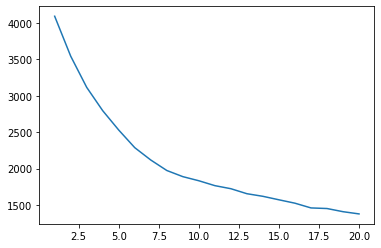

In [33]:
sns.lineplot(y=INERTIA, x=range(1,21))

Kesimpulan : Dari grafik, penurunan drastis ada di k = 6,7,8

##Yellowbrick

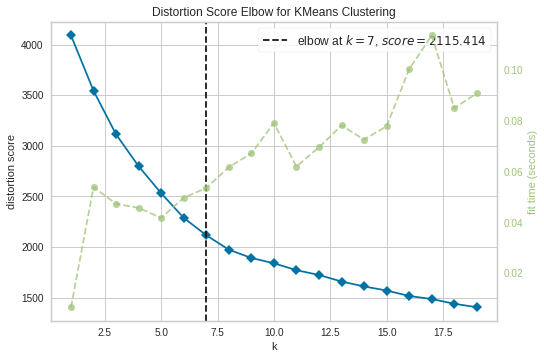

In [34]:
np.random.seed(31415)
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Kesimpulan dari Yellowbrick, k yang digunakan = 7

In [35]:
km = KMeans(n_clusters=7)
km.fit(X)
df_consumer_agg['cluster'] = km.predict(X)
df_consumer_agg

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
AA-10315,0.090909,0.000000,0.000000,0.909091,0.090909,0.727273,0.181818,505.778182,11,5563.560,0
AA-10375,0.266667,0.200000,0.000000,0.533333,0.066667,0.733333,0.200000,70.426000,15,1056.390,3
AA-10480,0.000000,0.000000,0.083333,0.916667,0.166667,0.666667,0.166667,149.209333,12,1790.512,3
AA-10645,0.388889,0.000000,0.000000,0.611111,0.444444,0.444444,0.111111,282.607500,18,5086.935,0
AB-10015,0.833333,0.000000,0.000000,0.166667,0.333333,0.500000,0.166667,147.692667,6,886.156,4
...,...,...,...,...,...,...,...,...,...,...,...
VS-21820,0.000000,0.250000,0.000000,0.750000,0.375000,0.500000,0.125000,131.997625,8,1055.981,1
WB-21850,0.171429,0.000000,0.314286,0.514286,0.142857,0.628571,0.228571,175.134571,35,6129.710,0
XP-21865,0.071429,0.107143,0.000000,0.821429,0.142857,0.750000,0.107143,84.809214,28,2374.658,0


##Segement Analysis - Sales

In [36]:
df_consumer_agg['cluster'].value_counts()

0    95
3    82
1    67
5    56
4    46
2    36
6    27
Name: cluster, dtype: int64

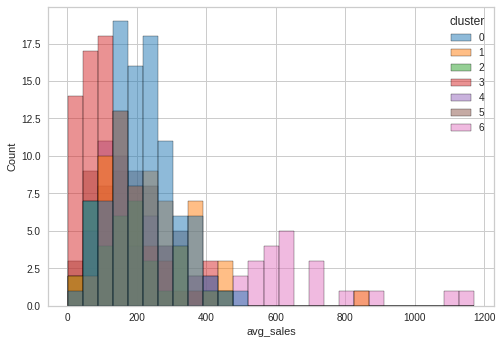

In [37]:
sns.histplot(data=df_consumer_agg, x='avg_sales', hue='cluster', palette='tab10')

Karena sebaran datanya saling tumpang tindih, maka digunakan bootstrap untuk lebih jelas dalam melihat data

##Bootstrapping

In [38]:
def bootstrap(df,column):
  BOOTS = []
  for i in range(200):
    for j in range(7):
      #with replacement
      mean = df[df['cluster'] == j].sample(100, replace=True)[column].mean()
      BOOTS.append((j,mean))
  df_boots = pd.DataFrame(BOOTS,columns=['cluster',column])
  return df_boots

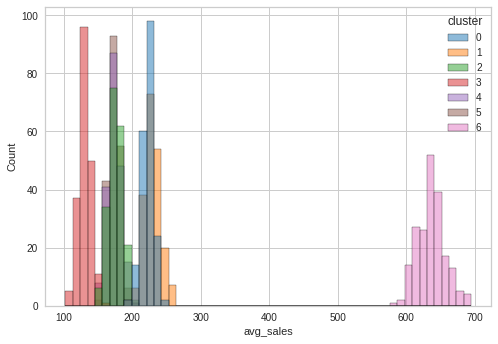

In [39]:
column = 'avg_sales'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

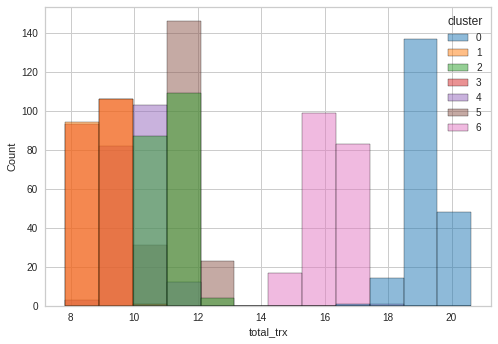

In [40]:
column = 'total_trx'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

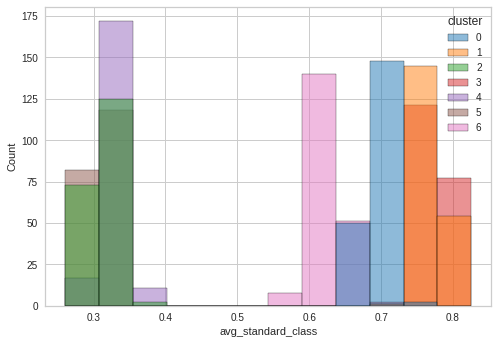

In [41]:
column = 'avg_standard_class'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

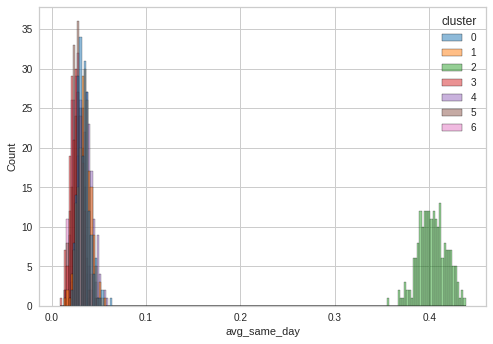

In [42]:
column = 'avg_same_day'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

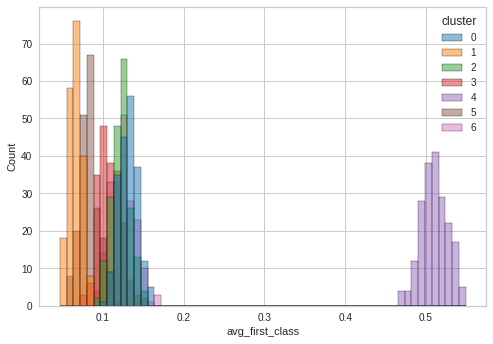

In [43]:
column = 'avg_first_class'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

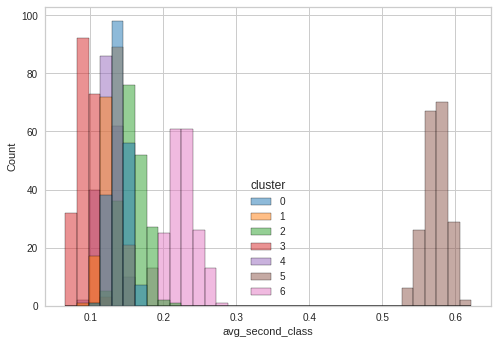

In [44]:
column = 'avg_second_class'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

## Agregasi per Cluster

In [45]:
df_cluster_agg = df_consumer_agg.groupby('cluster').median().reset_index()
df_cluster_agg

,cluster,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
0,0,0.107143,0.133333,0.000,0.705882,0.200000,0.607143,0.181818,214.799857,18.0,3670.258
1,1,0.000000,0.100000,0.000,0.750000,0.333333,0.428571,0.222222,209.732286,9.0,2095.064
2,2,0.095455,0.125000,0.375,0.296703,0.193750,0.591667,0.181985,159.988389,10.0,1581.052
3,3,0.000000,0.000000,0.000,0.800000,0.118056,0.750000,0.105556,115.502850,8.0,972.862
4,4,0.476190,0.100000,0.000,0.333333,0.258333,0.555556,0.178571,147.248379,9.5,1696.035
5,5,0.000000,0.559028,0.000,0.352941,0.175192,0.607692,0.193750,166.922868,12.0,1923.058
6,6,0.076923,0.125000,0.000,0.636364,0.187500,0.562500,0.222222,607.937115,16.0,9062.864


In [46]:
import matplotlib.pyplot as plt

In [47]:
sns.set(font_scale=2)

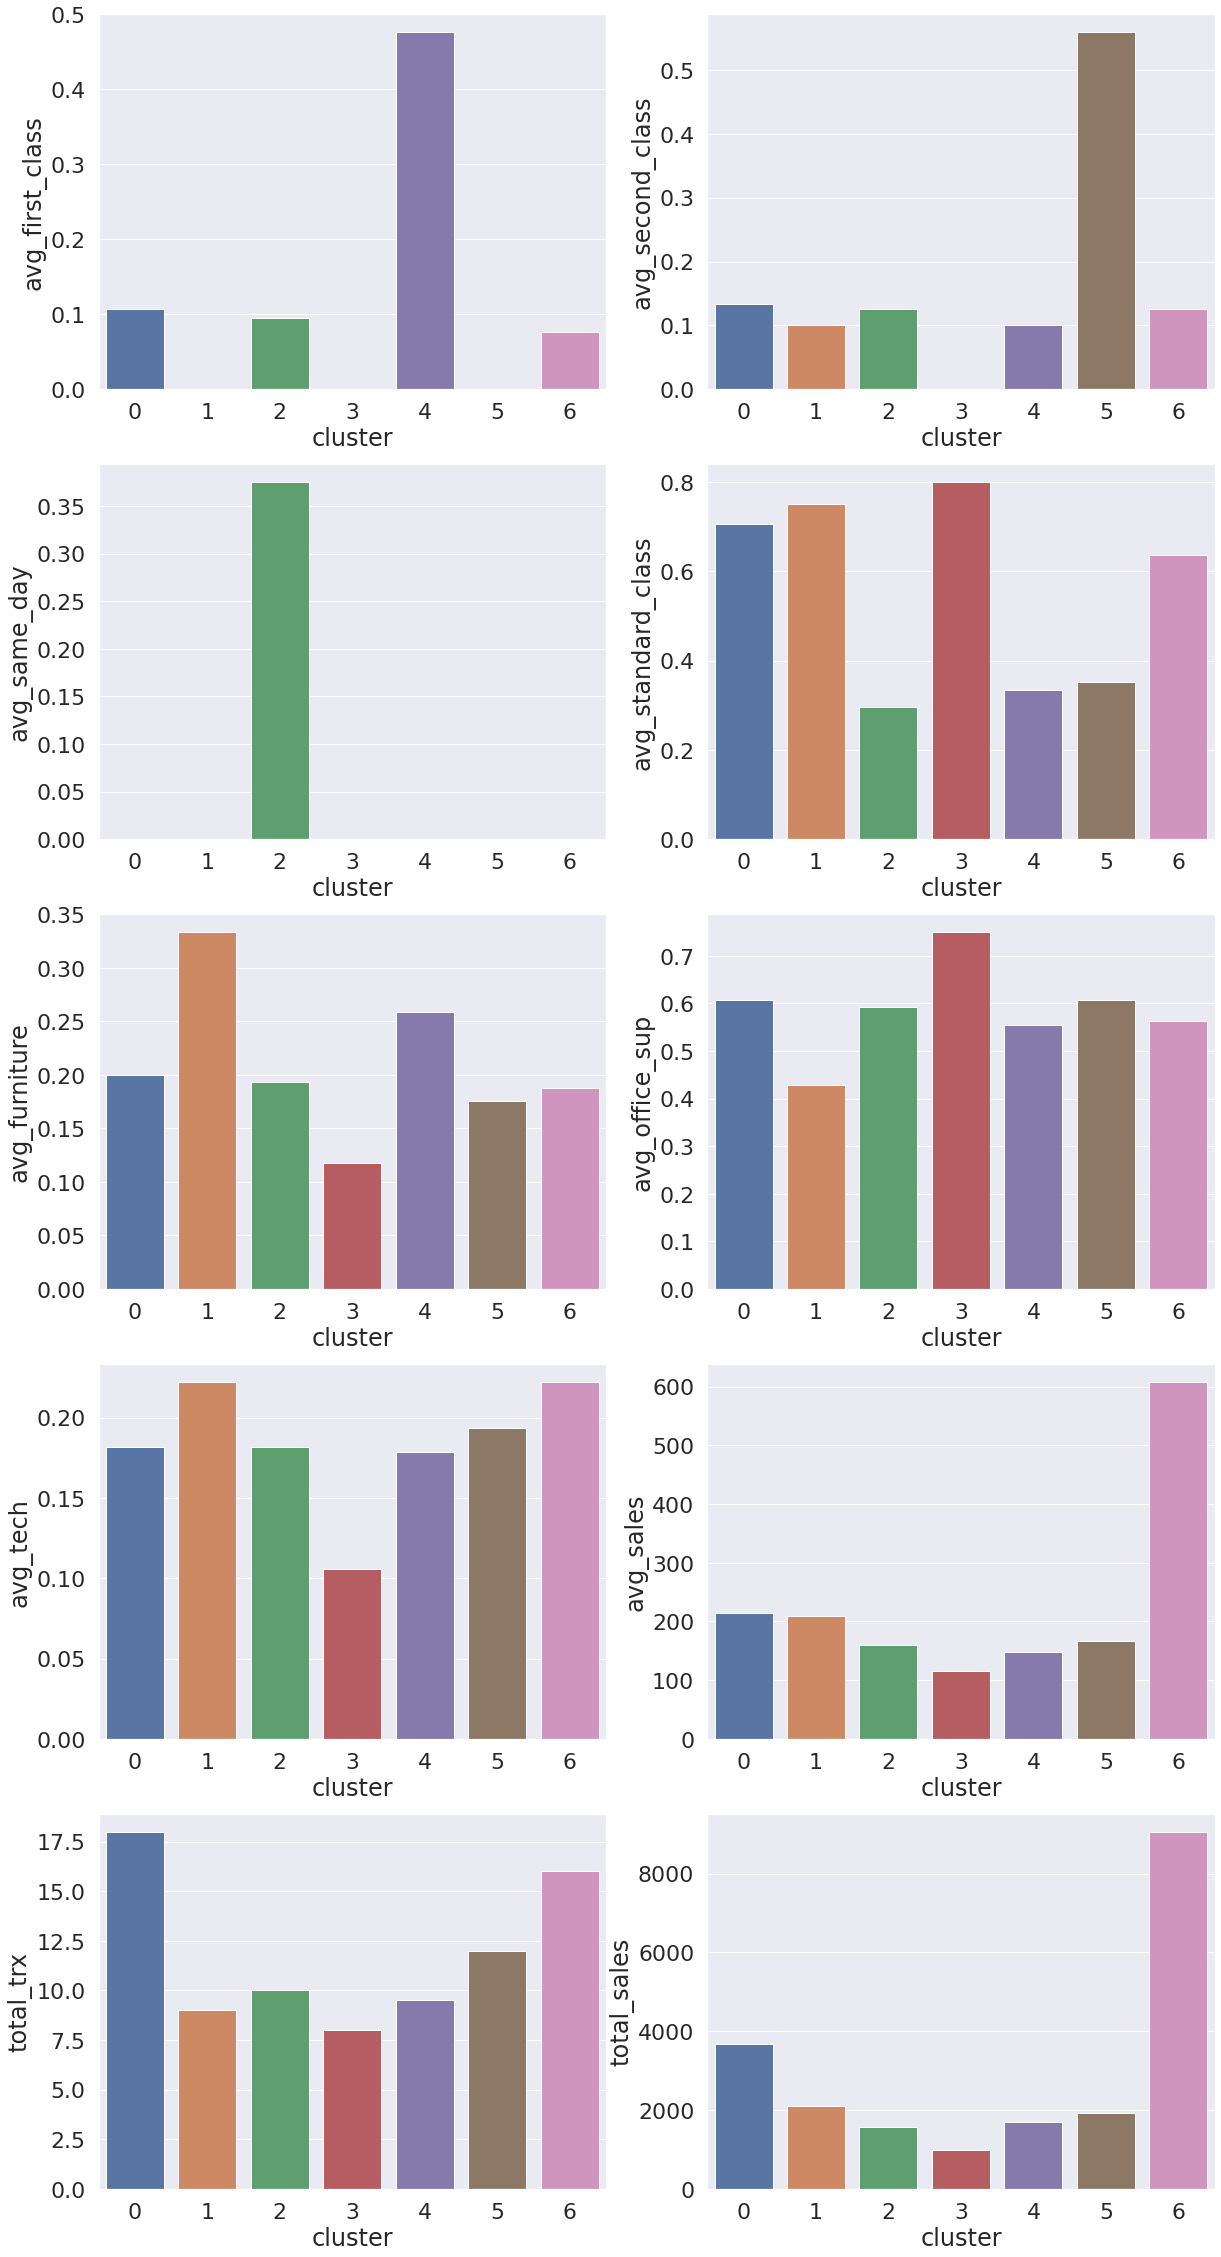

In [48]:
columns = df_cluster_agg.columns[1:] #Dimulai dari 1 karena tidak melibatkan kolom cluster

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 40))
for r in range(5): # jumlah baris / rows
    for c in range(2):  # jumlah column
        # avg_second_class => r=0, c=1
        column_idx = (r*2) + c # --> ngambil index columns yang ke (0*2) + 1 = 1
        sns.barplot( 
            data=df_cluster_agg, x='cluster', y=columns[column_idx], ax=axs[r][c])

In [49]:
# hvc = high value customer berdasarkan total_sales dan average sales
customer_id_hvc = df_consumer_agg[df_consumer_agg['cluster'] == 6].index
df[df['Customer ID'].isin(customer_id_hvc)].groupby('Sub-Category').size().sort_values(ascending=False)

Sub-Category
Binders        63
Paper          50
Phones         45
Storage        40
Furnishings    39
Chairs         34
Art            33
Accessories    30
Appliances     17
Machines       14
Tables         14
Bookcases      13
Labels         12
Envelopes      10
Supplies        9
Fasteners       9
Copiers         7
dtype: int64

# Data Science Mini project

Ambil segment lain selain "Consumer", lakukan segmentasi, berikan minimal 3 insight yang didapat.

#Segementasi Corporate

Di sini kita akan mencoba melakukan segementasi customer yang termasuk corporate

In [50]:
df.Segment.value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [51]:
df_corporate = df[df['Segment'] == 'Corporate'][['Customer ID','Ship Mode','Category','Sales']]
df_corporate.head()

,Customer ID,Ship Mode,Category,Sales
2,DV-13045,Second Class,Office Supplies,14.620
21,KB-16585,Standard Class,Office Supplies,19.460
22,KB-16585,Standard Class,Office Supplies,60.340
35,GH-14485,First Class,Technology,1097.544
36,GH-14485,First Class,Furniture,190.920


Kita akan melakukan step-step seperti pada segmentasi consumer sebelumnya

##One Hot Encoding Categorical

In [52]:
#One Hot Encoding

df_corporate_category = pd.get_dummies(df_corporate['Category'])
df_corporate_ship = pd.get_dummies(df_corporate['Ship Mode'])

df_corporate = pd.concat([df_corporate, df_corporate_category, df_corporate_ship], axis = 1)
df_corporate

,Customer ID,Ship Mode,Category,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
2,DV-13045,Second Class,Office Supplies,14.620,0,1,0,0,0,1,0
21,KB-16585,Standard Class,Office Supplies,19.460,0,1,0,0,0,0,1
22,KB-16585,Standard Class,Office Supplies,60.340,0,1,0,0,0,0,1
35,GH-14485,First Class,Technology,1097.544,0,0,1,1,0,0,0
36,GH-14485,First Class,Furniture,190.920,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9795,SH-19975,Standard Class,Office Supplies,3.798,0,1,0,0,0,0,1
9796,CS-12490,Standard Class,Office Supplies,10.368,0,1,0,0,0,0,1
9797,CS-12490,Standard Class,Technology,235.188,0,0,1,0,0,0,1
9798,CS-12490,Standard Class,Technology,26.376,0,0,1,0,0,0,1


In [53]:
df_corporate.drop(['Ship Mode','Category'], axis=1, inplace=True)
df_corporate.head()

,Customer ID,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
2,DV-13045,14.620,0,1,0,0,0,1,0
21,KB-16585,19.460,0,1,0,0,0,0,1
22,KB-16585,60.340,0,1,0,0,0,0,1
35,GH-14485,1097.544,0,0,1,1,0,0,0
36,GH-14485,190.920,1,0,0,1,0,0,0


##Aggregate per User

In [54]:
df_corporate_agg = df_corporate_agg = df_corporate.groupby('Customer ID').agg({
    # Pola ==> "Kolom": [('kolom_baru', 'fungsi_aggregasi')]
    # ship mode
    'First Class': [('avg_first_class', 'mean')],
    'Second Class': [('avg_second_class', 'mean')],
    'Same Day': [('avg_same_day', 'mean')],
    'Standard Class': [('avg_standard_class', 'mean')],
    
    # category
    'Furniture': [('avg_furniture', 'mean')],
    'Office Supplies': [('avg_office_sup', 'mean')],
    'Technology': [('avg_tech', 'mean')],
    
    # sales
    'Sales': [('avg_sales', 'mean'), ('total_trx', 'count'), ('total_sales', 'sum')]
})
df_corporate_agg 

First Class     Second Class     Same Day     Standard Class  \
            avg_first_class avg_second_class avg_same_day avg_standard_class   
Customer ID                                                                    
AB-10600           0.750000         0.000000     0.000000           0.250000   
AC-10420           0.000000         0.400000     0.000000           0.600000   
AC-10615           0.000000         0.000000     0.055556           0.944444   
AG-10300           0.200000         0.000000     0.000000           0.800000   
AG-10495           0.071429         0.142857     0.142857           0.642857   
...                     ...              ...          ...                ...   
VG-21805           0.200000         0.000000     0.000000           0.800000   
VP-21760           0.571429         0.000000     0.000000           0.428571   
VW-21775           0.166667         0.222222     0.000000           0.611111   
YC-21895           0.250000         0.000000     0.125000           0.625000   
YS-21880           0.083333         0.000000     0.000000           0.916667   

                Furniture Office Supplies Technology       Sales            \
            avg_furniture  avg_office_sup   avg_tech   avg_sales total_trx   
Customer ID                                                                  
AB-10600         0.250000        0.375000   0.375000  189.482750         8   
AC-10420         0.200000        0.800000   0.000000  185.160000         5   
AC-10615         0.222222        0.555556   0.222222  140.982556        18   
AG-10300         0.400000        0.600000   0.000000   73.509600         5   
AG-10495         0.142857        0.714286   0.142857  101.374786        14   
...                   ...             ...        ...         ...       ...   
VG-21805         0.000000        0.800000   0.200000   83.686400         5   
VP-21760         0.357143        0.428571   0.214286  240.037571        14   
VW-21775         0.222222        0.444444   0.333333  340.779889        18   
YC-21895         0.125000        0.625000   0.250000  681.793750         8   
YS-21880         0.250000        0.666667   0.083333  560.037000        12   

                         
            total_sales  
Customer ID              
AB-10600       1515.862  
AC-10420        925.800  
AC-10615       2537.686  
AG-10300        367.548  
AG-10495       1419.247  
...                 ...  
VG-21805        418.432  
VP-21760       3360.526  
VW-21775       6134.038  
YC-21895       5454.350  
YS-21880       6720.444  

[236 rows x 10 columns]

In [55]:
#menghilangkan multi level column
df_corporate_agg.columns = df_corporate_agg.columns.droplevel()
df_corporate_agg.head()

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
Customer ID,,,,,,,,,,
AB-10600,0.750000,0.000000,0.000000,0.250000,0.250000,0.375000,0.375000,189.482750,8,1515.862
AC-10420,0.000000,0.400000,0.000000,0.600000,0.200000,0.800000,0.000000,185.160000,5,925.800
AC-10615,0.000000,0.000000,0.055556,0.944444,0.222222,0.555556,0.222222,140.982556,18,2537.686
AG-10300,0.200000,0.000000,0.000000,0.800000,0.400000,0.600000,0.000000,73.509600,5,367.548
AG-10495,0.071429,0.142857,0.142857,0.642857,0.142857,0.714286,0.142857,101.374786,14,1419.247


##Scaling

In [56]:
scaler = StandardScaler()
scaler.fit(df_corporate_agg)

StandardScaler()

In [57]:
X = scaler.transform(df_corporate_agg)
X.shape

(236, 10)

In [58]:
X

array([[ 3.118945  , -0.9698398 , -0.44278868, ..., -0.22923443,
        -0.75066388, -0.57452289],
       [-0.87789674,  0.99936344, -0.44278868, ..., -0.24897564,
        -1.24969677, -0.81641198],
       [-0.87789674, -0.9698398 ,  0.24241936, ..., -0.45072592,
         0.91277909, -0.15563795],
       ...,
       [ 0.01029031,  0.124162  , -0.44278868, ...,  0.46171183,
         0.91277909,  1.31864496],
       [ 0.45438384, -0.9698398 ,  1.09892942, ...,  2.01905955,
        -0.75066388,  1.04001472],
       [-0.43380322, -0.9698398 , -0.44278868, ...,  1.46301882,
        -0.08528669,  1.55903532]])

##Elbow Method

In [59]:
#flow, coba cluster dengan k yang beragam dari 1 sampai 20 
INERTIA =[]
for i in range(20):
  km_i = KMeans(i+1) #+1 karena KMeans dimulai dari 1
  km_i.fit(X)
  INERTIA.append(km_i.inertia_)

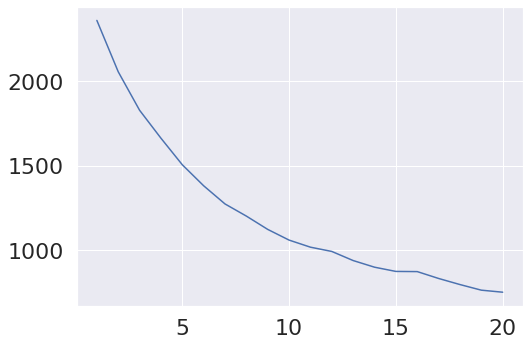

In [60]:
sns.lineplot(y=INERTIA, x=range(1,21))

##Yellowbrick

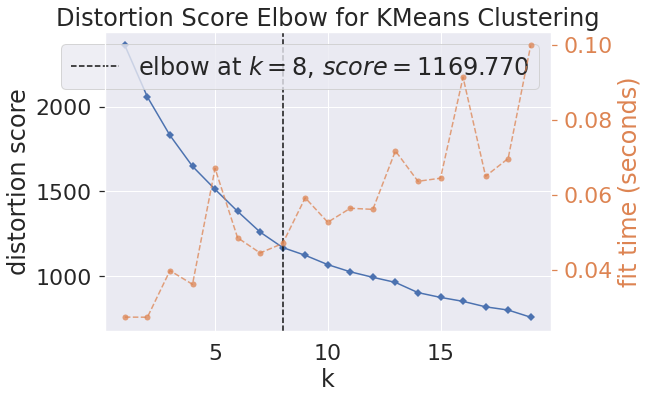

In [61]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Didapat jumlah cluster terbaik adalah 8

In [62]:
km = KMeans(n_clusters=8)
km.fit(X)
df_corporate_agg['cluster'] = km.predict(X)
df_corporate_agg

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
AB-10600,0.750000,0.000000,0.000000,0.250000,0.250000,0.375000,0.375000,189.482750,8,1515.862,3
AC-10420,0.000000,0.400000,0.000000,0.600000,0.200000,0.800000,0.000000,185.160000,5,925.800,1
AC-10615,0.000000,0.000000,0.055556,0.944444,0.222222,0.555556,0.222222,140.982556,18,2537.686,2
AG-10300,0.200000,0.000000,0.000000,0.800000,0.400000,0.600000,0.000000,73.509600,5,367.548,1
AG-10495,0.071429,0.142857,0.142857,0.642857,0.142857,0.714286,0.142857,101.374786,14,1419.247,1
...,...,...,...,...,...,...,...,...,...,...,...
VG-21805,0.200000,0.000000,0.000000,0.800000,0.000000,0.800000,0.200000,83.686400,5,418.432,1
VP-21760,0.571429,0.000000,0.000000,0.428571,0.357143,0.428571,0.214286,240.037571,14,3360.526,3
VW-21775,0.166667,0.222222,0.000000,0.611111,0.222222,0.444444,0.333333,340.779889,18,6134.038,7


##Segement Analysis - Sales

In [63]:
df_corporate_agg['cluster'].value_counts()

1    58
7    49
2    39
3    36
5    27
4    18
0     5
6     4
Name: cluster, dtype: int64

Dapat dilihat bahwa cluster ke 0 dan 6 datanya minim sehingga dapat kita abaikan dalam pembuatan grafik

In [64]:
# #Drop cluster yang minim data
# df_corporate_agg = df_corporate_agg[~df_corporate_agg['cluster'].isin([0,6])]

In [78]:
sns.set(font_scale=1)

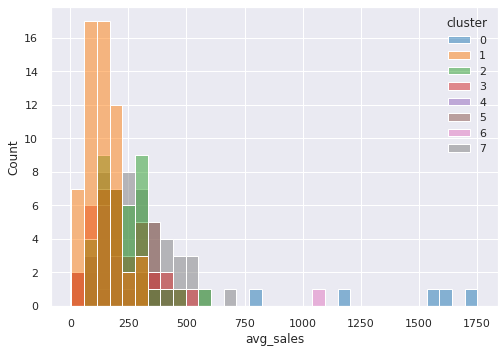

In [79]:
sns.histplot(data=df_corporate_agg, x='avg_sales', hue='cluster', palette='tab10')

##Bootstrapping

In [66]:
def bootstrap_corporate(df,column):
  BOOTS = []
  for i in range(200):
    for j in range(8):
      #with replacement
      mean = df[df['cluster'] == j].sample(100, replace=True)[column].mean()
      BOOTS.append((j,mean))
  df_boots = pd.DataFrame(BOOTS,columns=['cluster',column])
  return df_boots

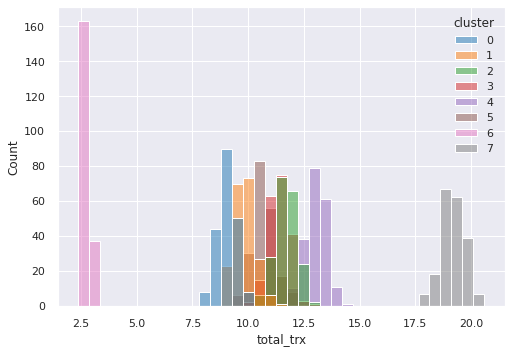

In [80]:
column = 'total_trx'
df_boots = bootstrap_corporate(df_corporate_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

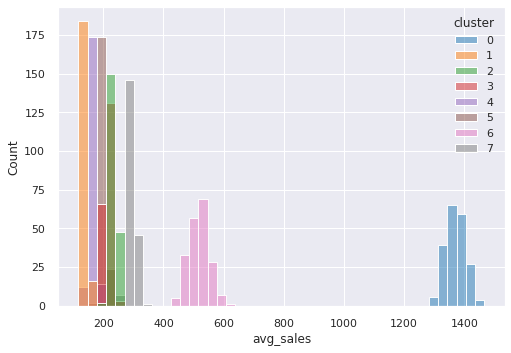

In [81]:
column = 'avg_sales'
df_boots = bootstrap_corporate(df_corporate_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

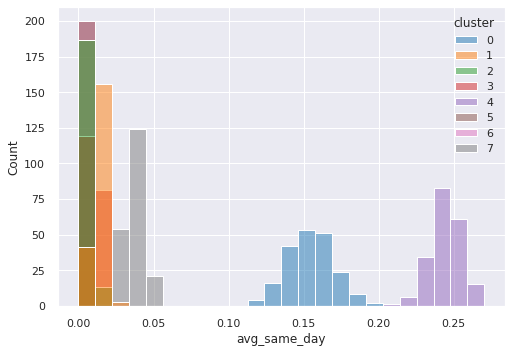

In [82]:
column = 'avg_same_day'
df_boots = bootstrap_corporate(df_corporate_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

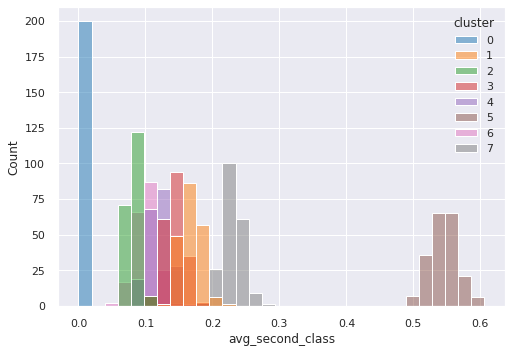

In [83]:
column = 'avg_second_class'
df_boots = bootstrap_corporate(df_corporate_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

## Agregasi per Cluster

In [71]:
df_cluster_agg = df_corporate_agg.groupby('cluster').median().reset_index()
df_cluster_agg

,cluster,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
0,0,0.166667,0.000000,0.111111,0.666667,0.166667,0.400000,0.222222,1558.535333,9.0,10501.6530
1,1,0.065126,0.125000,0.000000,0.714286,0.148352,0.750000,0.090909,134.193443,9.0,1270.6620
2,2,0.000000,0.066667,0.000000,0.866667,0.250000,0.500000,0.250000,220.168600,11.0,2454.6220
3,3,0.400000,0.118056,0.000000,0.449495,0.153846,0.618056,0.222222,202.696163,11.5,2248.1265
4,4,0.226496,0.087121,0.215839,0.453416,0.306250,0.643182,0.094298,129.910206,12.5,2222.1790
5,5,0.100000,0.538462,0.000000,0.375000,0.300000,0.500000,0.153846,193.664000,10.0,1804.1460
6,6,0.433333,0.000000,0.000000,0.366667,0.900000,0.000000,0.000000,428.126000,2.5,1686.8820
7,7,0.083333,0.214286,0.000000,0.636364,0.187500,0.600000,0.210526,272.001417,19.0,4802.3940


In [72]:
#Drop cluster yang minim data
df_cluster_agg = df_cluster_agg[~df_cluster_agg['cluster'].isin([0,6])]
df_cluster_agg

,cluster,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
1,1,0.065126,0.125000,0.000000,0.714286,0.148352,0.750000,0.090909,134.193443,9.0,1270.6620
2,2,0.000000,0.066667,0.000000,0.866667,0.250000,0.500000,0.250000,220.168600,11.0,2454.6220
3,3,0.400000,0.118056,0.000000,0.449495,0.153846,0.618056,0.222222,202.696163,11.5,2248.1265
4,4,0.226496,0.087121,0.215839,0.453416,0.306250,0.643182,0.094298,129.910206,12.5,2222.1790
5,5,0.100000,0.538462,0.000000,0.375000,0.300000,0.500000,0.153846,193.664000,10.0,1804.1460
7,7,0.083333,0.214286,0.000000,0.636364,0.187500,0.600000,0.210526,272.001417,19.0,4802.3940


In [73]:
columns = df_cluster_agg.columns[1:] #Dimulai dari 1 karena tidak melibatkan 

In [74]:
df_corporate_agg['cluster'].value_counts()

1    58
7    49
2    39
3    36
5    27
4    18
0     5
6     4
Name: cluster, dtype: int64

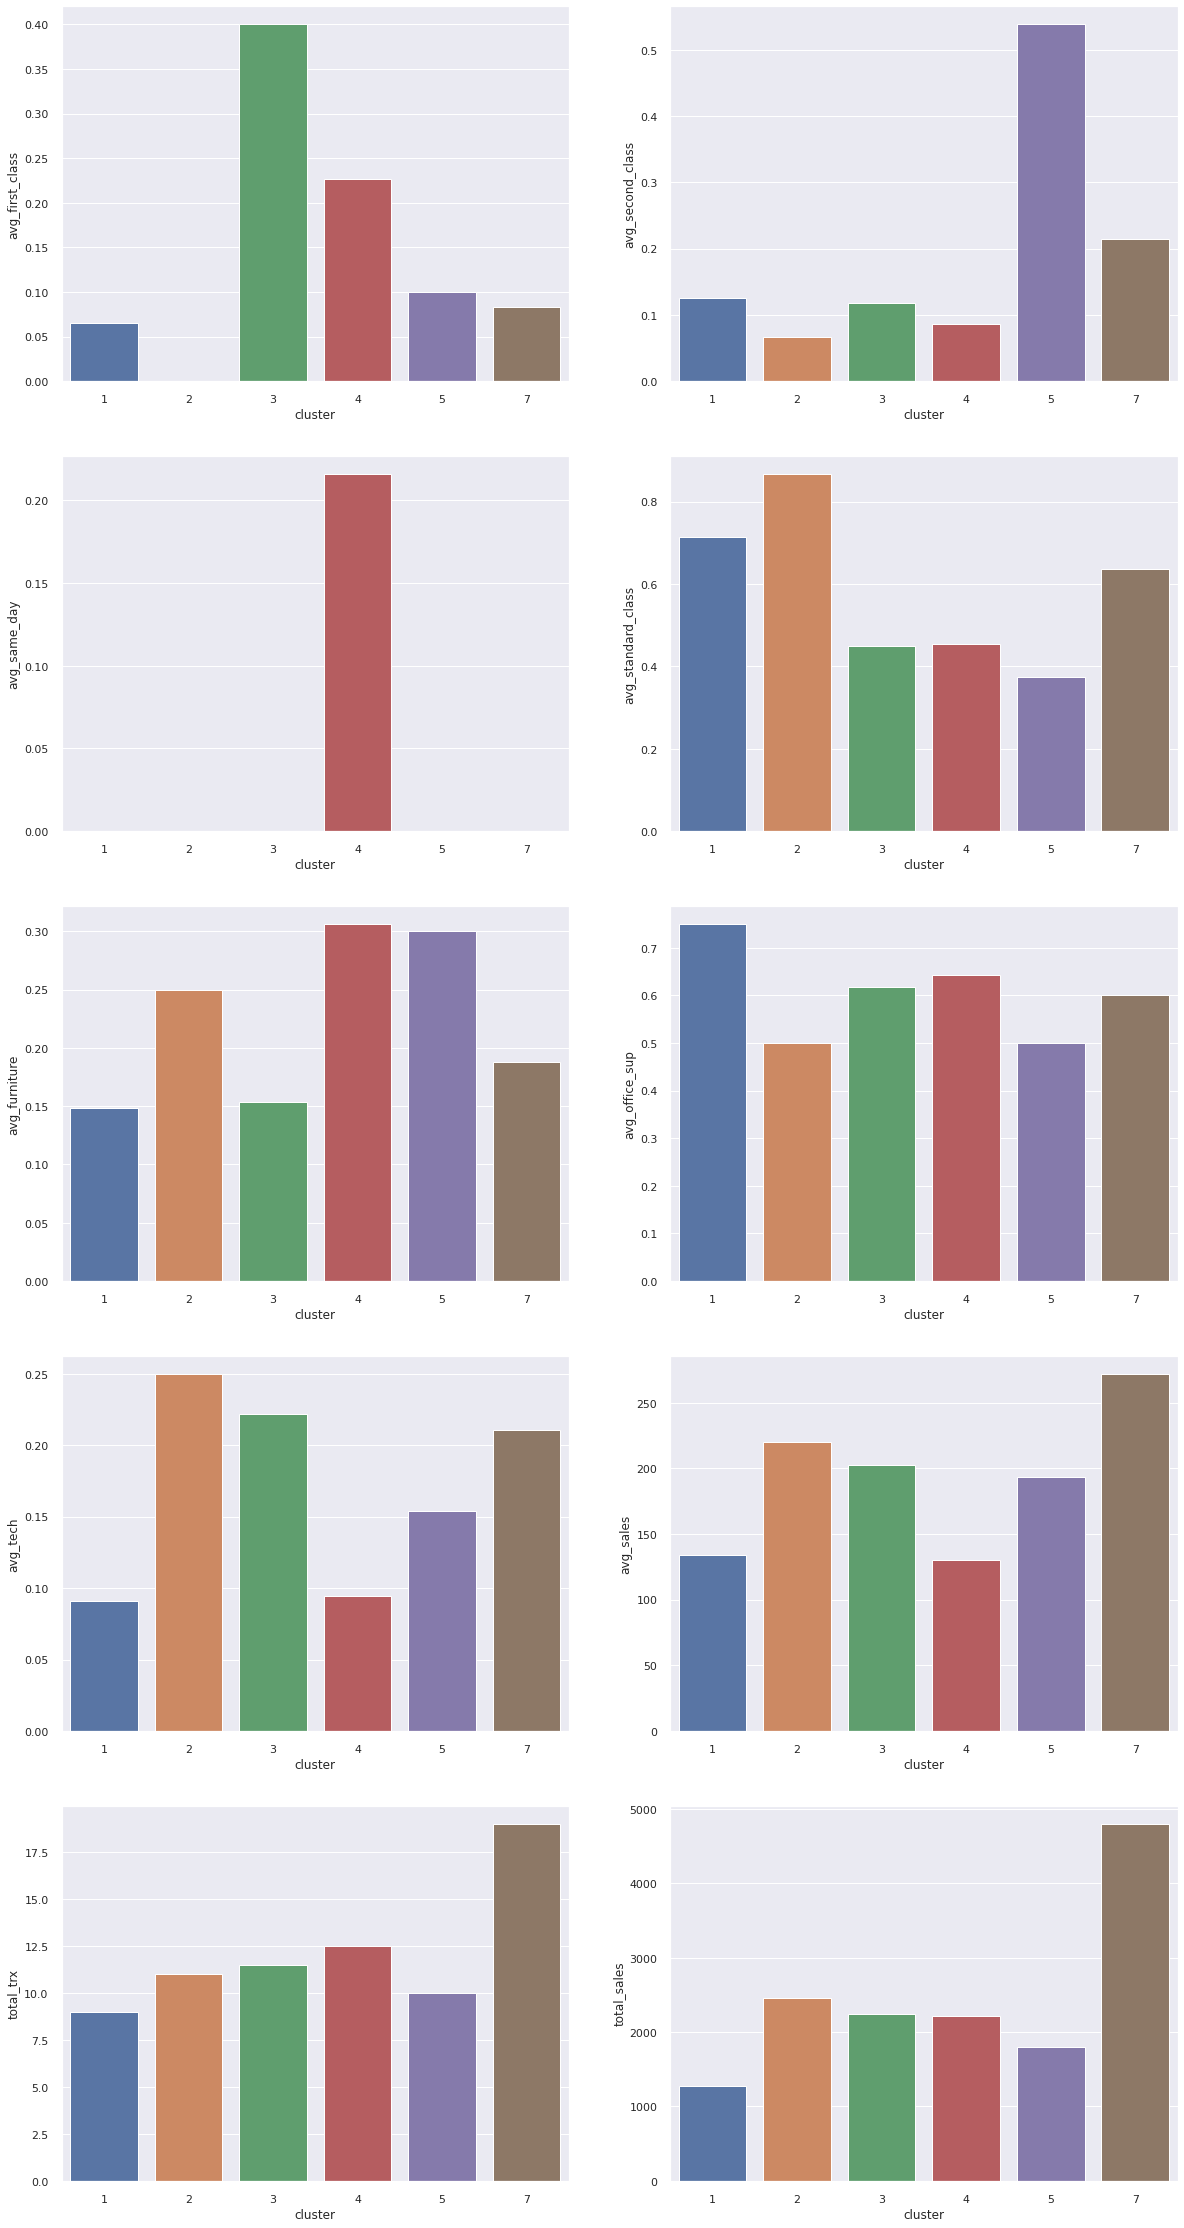

In [84]:
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 40))
for r in range(5): # jumlah baris / rows
    for c in range(2):  # jumlah column
        # avg_second_class => r=0, c=1
        column_idx = (r*2) + c # --> ngambil index columns yang ke (0*2) + 1 = 1
        sns.barplot(data=df_cluster_agg, x='cluster', y=columns[column_idx], ax=axs[r][c])

In [76]:
# hvc = high value customer berdasarkan total_sales dan average sales
customer_id_hvc = df_corporate_agg[df_corporate_agg['cluster'] == 7].index
df[df['Customer ID'].isin(customer_id_hvc)].groupby('Sub-Category').size().sort_values(ascending=False)

Sub-Category
Binders        140
Paper          132
Phones         100
Furnishings     83
Storage         81
Accessories     72
Art             71
Chairs          61
Appliances      45
Envelopes       31
Labels          30
Tables          28
Fasteners       18
Bookcases       16
Machines        15
Supplies        13
Copiers          5
dtype: int64

In [77]:
df[df['Customer ID'].isin(customer_id_hvc)].groupby('Category').size().sort_values(ascending=False)

Category
Office Supplies    561
Technology         192
Furniture          188
dtype: int64

##Insight

-	Pembelian dengan tipe ship mode “First Class” didominasi oleh cluster 3
-	Pembelian dengan tipe ship mode “Second Class” didominasi oleh cluster 5
-	Pembelian dengan tipe ship mode “Same day”  hanya ada di cluster 4
-	Pembelian Category  “Furniture”  secara umum ada pada cluster 4 dan 5
-	Pembelian Category  “tech”  tertinggi ada pada cluster 2
-	Pembelian Category  “Office supply”  tertinggi ada pada cluster 1
-	Total transaksi terbanyak ada pada cluster 7
-	Rata-rate penjualan dan total penjualan terbanyak ada di cluster 7 yang bisa kita katakan sebagai high value customer


##Kesimpulan

Berikut adalah kesimpulan berdasarkan insight yang telah kita dapatkan dari visualisasi grafik pada segment corporate 

- Segment corporate dapat dibagi menjadi 8 segment berdasarkan polanya tetapi cluster 0 dan 6 dapat diabaikan dikarenakan jumlah data yang minim
- Cluster 5 biasanya membeli "Furniture" dengan ship mode "Second Class". Kedepannya kita bisa memberikan penawaran promo berupa diskon atau free barang setiap pembelian furniture
- Cluster 2 didominasi oleh pembelian "tech". Kedepannya kita bisa memberikan penawaran berupa diskon untuk produk "tech" tertentu agar bisa lebih banyak traffic pembeliannya.
-Cluster 1 didominasi oleh pembelian "Office Supply". Kedepannya kita bisa memberikan penawaran berupa buy one get one free atau berupa diskon produk "Office Supply"
-Cluster 7 merupakan High value customer kita dimana memiliki total transaksi,rata-rata sales, dan total sales terbesar di antara cluster lainnya sehingga kita harus lebih concern kepada cluster ini. Pemberian promo khusus cluster ini bisa berupa diskon yang lebih besar terhadap cluster lainnya. Pemberian rekomendasi pada tampilan Home customer ini harus disesuaikan dengan pembelian terbanyak yang dilakukan cluster ini. Pembelian terbanyaknya pada Sub-Category yaitu adalah Binders dan Papers yang termasuk ke dalam Category Office Supplies. 